In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
x_train = np.load('/content/gdrive/My Drive/dataset/x_train.npy')
y_train = np.load('/content/gdrive/My Drive/dataset/y_train.npy')
x_val = np.load('/content/gdrive/My Drive/dataset/x_val.npy')
y_val = np.load('/content/gdrive/My Drive/dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(256,256,1), kernel_size=3, filters=32, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation='sigmoid', padding='same'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation='sigmoid', padding='same'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=1, activation='sigmoid', padding='same'),
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= 'binary_crossentropy',
             metrics=['acc', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 32, 32, 128)       1

In [7]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),epochs=100, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
8/8 [==============================] - 3s 388ms/step - loss: 0.5415 - acc: 0.7510 - mse: 0.1753 - val_loss: 0.4748 - val_acc: 0.7527 - val_mse: 0.1546
Epoch 2/100
8/8 [==============================] - 1s 173ms/step - loss: 0.4550 - acc: 0.7510 - mse: 0.1493 - val_loss: 0.4622 - val_acc: 0.7527 - val_mse: 0.1557
Epoch 3/100
8/8 [==============================] - 1s 173ms/step - loss: 0.4623 - acc: 0.7416 - mse: 0.1548 - val_loss: 0.3994 - val_acc: 0.7527 - val_mse: 0.1311
Epoch 4/100
8/8 [==============================] - 1s 174ms/step - loss: 0.4062 - acc: 0.7557 - mse: 0.1346 - val_loss: 0.3599 - val_acc: 0.7712 - val_mse: 0.1189
Epoch 5/100
8/8 [==============================] - 1s 175ms/step - loss: 0.3742 - acc: 0.7786 - mse: 0.1239 - val_loss: 0.3870 - val_acc: 0.7650 - val_mse: 0.1336
Epoch 6/100
8/8 [==============================] - 1s 177ms/step - loss: 0.3760 - acc: 0.7701 - mse: 0.1255 - val_loss: 0.3628 - val_acc: 0.7762 - val_mse: 0.1184
Epoch 7/100
8/8 [=====

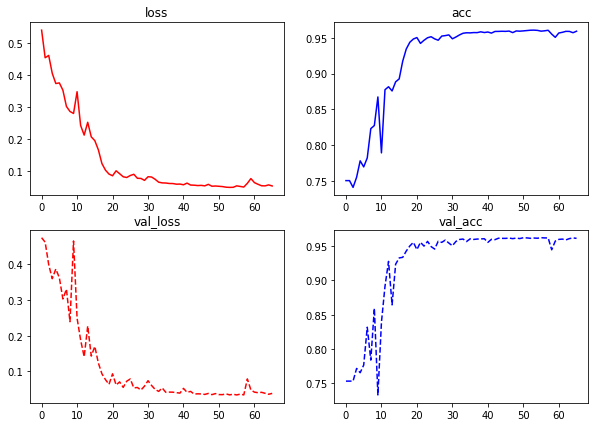

In [8]:
fig, ax = plt.subplots(2, 2,figsize=(10,7))

ax[0,0].set_title('loss')
ax[0,0].plot(history.history['loss'], 'r')
ax[0,1].set_title('acc')
ax[0,1].plot(history.history['acc'], 'b')

ax[1,0].set_title('val_loss')
ax[1,0].plot(history.history['val_loss'], 'r--')
ax[1,1].set_title('val_acc')
ax[1,1].plot(history.history['val_acc'], 'b--')


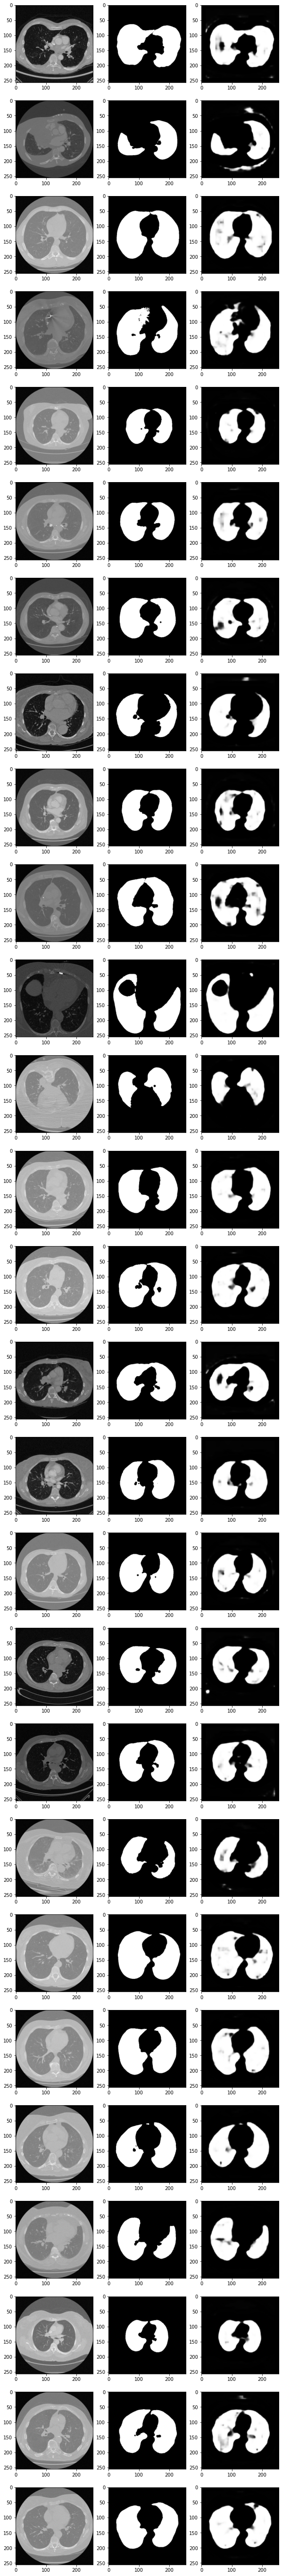

In [9]:
preds = model.predict(x_val)
fig, ax = plt.subplots(len(x_val), 3, figsize = (10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')